# Data Visualization Part 1

In [1]:
# Adding the neccecary imports to our code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydot # conda install pydot
import time

In [2]:
#type of data:
url_Les_Miserables_network  = '../data/LesMiserables.dot'
url_Rome_graph  = '../data/rome.dot'
url_Jazz_Network  = '../data/JazzNetwork.dot'
url_Small_Directed_Network  = '../data/noname.dot'
url_Pro_League_Network  = '../data/LeagueNetwork.dot'
url_Argumentation_network  = '../data/devonshiredebate_withclusters.dot'
url_Political_blogosphere_network  = '../data/polblogs.dot'

In [17]:
# classes
class Vertex:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x
        self.y = y
        self.neighbors = []
    def add_neighbor(self,neighbor):
        self.neighbors.append(neighbor)
class Edge:
    def __init__(self, start, end):
        self.start = start
        self.end = end

class Graph:
    def __init__(self):
        self.vertices = []
        self.edges = []

    def add_vertex(self, vertex):
        self.vertices.append(vertex)

    def add_edge(self, edge):
        self.edges.append(edge)

    def get_vertex(self, id):
        for vertex in self.vertices:
            if vertex.id == id:
                return vertex
        return None
    def visualize_graph(self,custom_figsize,radius): # O(V + V + E) = O(2V + E) = O(V + E)
        self.place_vertices_in_circle(radius) # O(V)
        fig, ax = plt.subplots(figsize=(custom_figsize, custom_figsize))  # Adjust width and height as needed
        # Plot Vertices
        scaling_factor = 1 / len(self.vertices)
        for vertex in self.vertices: # O(V)

            ax.scatter(vertex.x, vertex.y, color='blue', zorder=2, s= scaling_factor* 40000*(custom_figsize/15), edgecolors='black')
            ax.text(vertex.x, vertex.y, str(vertex.id), fontsize= (scaling_factor* 40000*(custom_figsize/15))/100, ha='center', va='center', zorder=len(self.vertices) * scaling_factor * 2, color='white')

        # Plot edges
        for edge in self.edges: #O(E)
            start = edge.start
            end = edge.end
            ax.plot([start.x, end.x], [start.y, end.y], color='gray', zorder=1, linewidth=0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Graph Visualization')
        ax.grid(True)
        plt.show()
    def visualize_graph_Bonus(self,custom_figsize,radius): # O(V + V + E) = O(2V + E) = O(V + E)
        avg_nghb=0
        #compute average neighbors
        for vertex in self.vertices:
          avg_nghb+= len(vertex.neighbors)
        avg_nghb= avg_nghb/len(self.vertices)
        print("avg neighbors",avg_nghb)
        #---
        self.place_vertices_in_circle_Bonus(radius,avg_nghb) # O(V)
        fig, ax = plt.subplots(figsize=(custom_figsize, custom_figsize))  # Adjust width and height as needed
        # Plot Vertices
   # Plot Vertices
        scaling_factor = 1 / len(self.vertices)
        for vertex in self.vertices: # O(V)

            ax.scatter(vertex.x, vertex.y, color='blue', zorder=2, s= scaling_factor* 40000*(custom_figsize/15), edgecolors='black')
            ax.text(vertex.x, vertex.y, str(vertex.id), fontsize= (scaling_factor* 40000*(custom_figsize/15))/100, ha='center', va='center', zorder=len(self.vertices) * scaling_factor * 2, color='white')
        # Plot edges
        for edge in self.edges: #O(E)
            start = edge.start
            end = edge.end
            ax.plot([start.x, end.x], [start.y, end.y], color='gray', zorder=1, linewidth=0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Graph Visualization')
        ax.grid(True)
       # ax.set_aspect('equal', adjustable='box')
        plt.show()
    def place_vertices_in_circle(self,radius): # O(V)
        num_vertices = len(self.vertices)
        radius = radius  # Radius of the circle
        center_x = 0
        center_y = 0
        angle_increment = 4 * np.pi / num_vertices

        # Place vertices in a bit of randomized circle
        for i, vertex in enumerate(self.vertices): # O(V)
            angle = i * angle_increment
            vertex.x = center_x + radius * np.cos(angle)
            vertex.y = center_y + radius * np.sin(angle)
    def place_vertices_in_circle_Bonus(self,radius,avg_nghb): # O(V)

        num_vertices = len(self.vertices)
        radius = radius  # Radius of the circle
        given_radius = radius
        center_x = 0
        center_y = 0
        angle_increment = 4 * np.pi / num_vertices

        # Place vertices in a bit of randomized circle
        for i, vertex in enumerate(self.vertices): # O(V)
            radius = given_radius
            if len(vertex.neighbors) > avg_nghb/3 and  len(vertex.neighbors) <= avg_nghb :
              radius=radius-10
            if len(vertex.neighbors) > avg_nghb :
              radius=radius-20
            angle = i * angle_increment
            vertex.x = center_x + radius * np.cos(angle)
            vertex.y = center_y + radius * np.sin(angle)

In [18]:
def create_custom_graph(G): # O(V) + O(E) + O(V) + O(E) = O(2V + 2E) = O(V + E)
    # Parsing the vertices and edges from the generated graph into lists
    vertices = [n.get_name() for n in G.get_node_list()] # O(V)
    edges = [(edge.get_source(),edge.get_destination(),edge.get_weight()) for edge in G.get_edge_list()] # O(E)
    graph = Graph()
    for vertex in vertices: # O(V)
        vertex = Vertex(vertex, 0, 0)  # Initialize the vertex with ID and default coordinates
        graph.add_vertex(vertex)
    for edge in edges: # O(E)
        source_vertex = graph.get_vertex(edge[0])
        neighbor_vertex = graph.get_vertex(edge[1])
        if source_vertex is None:
            source_vertex = Vertex(edge[0], 0, 0)
        if neighbor_vertex is None:
            neighbor_vertex = Vertex(edge[1], 0, 0)
        source_vertex.add_neighbor(neighbor_vertex)
        graph.add_edge(Edge(source_vertex, neighbor_vertex))
    return graph

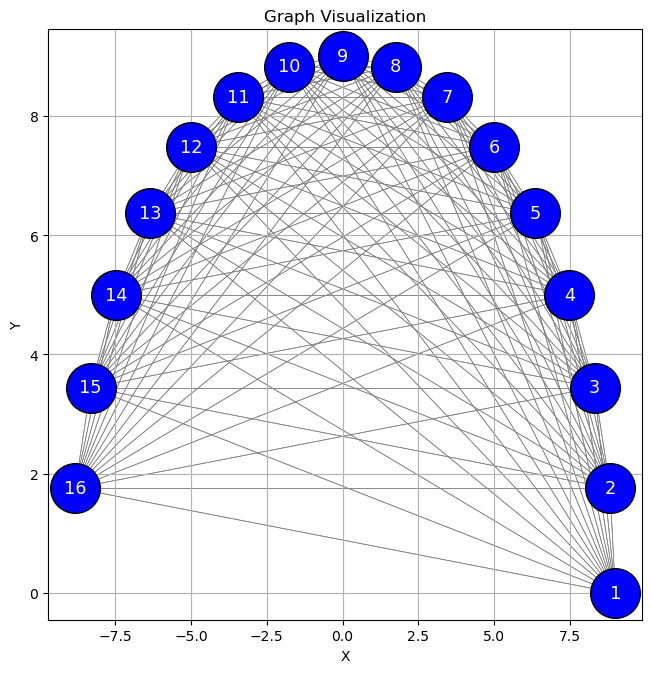

In [19]:
# Parsing the data from the dot file:
G = pydot.graph_from_dot_file(url_Pro_League_Network)[0]
#Convering the graph into our custom graph
graph = create_custom_graph(G) #O(V) + O(E) = O(V + E)
# Visualize the graph
fig_size=5+len(graph.vertices)/6 # new line
radius=5+len(graph.vertices)/4 # new line
graph.visualize_graph(fig_size,radius) #O(V + E)

avg neighbors 14.9375


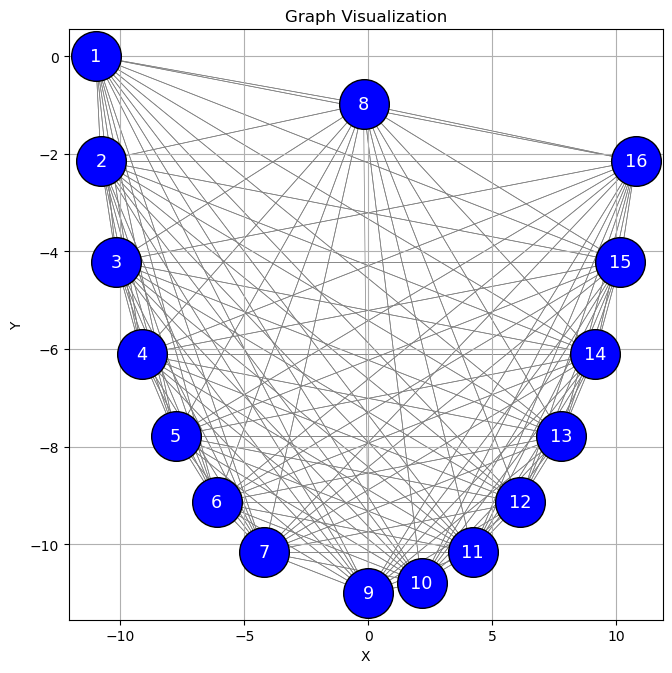

Runtime: 2.7309701442718506 seconds


In [20]:
# Run Bonus part


start_time = time.time()
# Parsing the data from the dot file:
G = pydot.graph_from_dot_file(url_Pro_League_Network)[0]
#Convering the graph into our custom graph
graph = create_custom_graph(G) #O(V) + O(E) = O(V + E)
# Visualize the graph
fig_size=5+len(graph.vertices)/6 # new line
radius=5+len(graph.vertices)/4 # new line
graph.visualize_graph_Bonus(fig_size,radius) #O(V + E) #O(V + E)

end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

# Complexity of our layout algorithm:
First, we converted the dot file into a graph representation. In order to work effectively with this graph, we designed a custom structure that is more sutable for our requirements, by using the function "create_custom_graph" that takes the generated graph and convert it into our graph.
Subsequently, our algorithm proceeds as follows:
We iterate through all vertices of the graph and plot them in a circular format. This process has time complexity of $O(V)$.
Next, we scan through the edges of the graph. For each edge, we draw a line between the corresponding pair of vertices. This step has time complexity of $O(E)$ since it involves iterating over all edges.

Therefore, the total **time complexity** of our layout algorithm is **$O(V + E)$**, where V represents the number of vertices and E represents the number of edges in the graph.

In addition, the **space complexity** is **$ O(V^2 + E) $**:
* The class "Edge" is $O(1)$, because it only contains simple variables.
* The class "Vertex" is $O(V)$, because it contains a list of vertices,where in the worst case can contain as much vertices as the total
  vertices - 1. Which is $O(V)$, where V denotes the number of vertices in the graph.
* The class "Graph" is $ O(V^2 + E) $ because we have 2 lists, the first list contains all the vertices ( = $ O(V*V) = O(V^2) $ ) and the second list contains all the edges ( =$O(E)$) , therefore, the total space complexity is $ O(V^2 + E) $, where V represents the number of vertices and E represents the number of edges in the graph.

The total space complexity is $ O(V^2 + E + V + E) = O(V^2 + E) $

# Pro's and Con's
### Pro's:
* Our algorithm performs well in small and medium size datasets (e.g. noname.dot, LeagueNetwork.dot), by visualizing the graph in a circular structure.
* Our algorithm has less overlapping vertices (e.g JazzNetwork.dot), we achieved that by making the distance between the vertices equal, with respect to the overall number of vertices.
* Our algorithm is very fast and efficient, with time complexity of **$O(V+E)$** and space complexity of **$O(V^2+E)$**

### Con's
* Our algorithm has a problem with large datasets visualization (e.g. polblogs.dot), due to the fact that large datasets contains a lot of vertices and edges which makes the graph unreadable.
* 
Our algorithm struggles to represent long strings in an understandable way. For example, the graph from polblogs.dot has words instead of numbers as the ID of each vertex. To address this, we need to adjust the shape and size of the vertices accordingly, which leads to overlapping between the vertices.

Unfortunately, our algorithm cannot handle the visualization and management of those cons in a readable and clean way.




# Bonus Part

In this part we took the original layout of the vertex placement and adjust it in order to make an improved visualized graph with clearer and more informative results, Espacially for large datasets (e.g. JazzNetwork.dot). We've done so by adding layers into the calculation of the vertices' location to the original graph. Each layer contains vertices with a range of neighbors. The outer layer includes vertices with number of vertices equal or fewer than the average number of neighbors divided by 3, the middle layer contains all the vertices with number of neighbors beween the average number of neighbors and the average number of neighbors divided by 3, and the inner layer includes all remaining vertices. We've done so, because in our original layout (where all of the vertices are on the same layer = in the same distance from the center(0,0)) we couldn't (or it was very hard) to distinguish between the nodes that has fewer neighbors than the ones that has more neighbors. We acomplished this by creating new function called "place_vertices_in_circle_Bonus" that in addition to placing the nodes into a circular shape also dividing them into the layers (as explained above). In that function we added few "if" statemenst that helped us seperate the nodes by neighbors with changing the radius (the distance from the center (0,0) according to the corresponding layer(as explained above).

As a result of changing the positions of the vertices (with the new function called "place_vertices_in_circle_Bonus") we got a better visualization than just using the original algorithm.
The new algorithm differ from the original algorithm by additional "if" statements that all of them are $O(1)$ (we are just assining new value to a variable), therefore the time complexity did not change and stayed $O(V)$ where V denotes the number of vertices in the graph.

The running time for the the bonus part on the JazzNetwork.dot file is 19.623712301254272 seconds

Additionally, in order to visualize the graph in this part we needed to calculate additional things(the average neighbors and the running time), we still need to iterate through all of the vertices and edges, as in the original algorithm. The **time complexity** remains **$O(V + E)$** where V denotes the vertices and E denotes the edges in the graph. Although we created a new visualization function for the bonus part called "visualize_graph_Bonus", which involves computing the average and running time, we added one more loop with a time complexity of $O(V)$.
However, since it is not nested within the other loops, its time complexity is $O(V+V+V+E) = O(3V+E) = O(V+E)$.

We didn't change any of our data structures therefore the **space complexity** didn't change either and stayed **$O( V^2 + E )$**.


# PART 2

In [7]:
  
class node_for_BFS:
    def __init__(self, id):
        self.id = id
        self.color = 0 # 0 = white(not visited) | 1 = gray (visited & inside the queue) | 2 = black (visited & outside the queue)
        self.distance = float('inf')
        self.parent = None
    def __hash__(self):
        return hash(self.id)

    def __eq__(self, other):
        if isinstance(other, NodeForBFS):
            return self.id == other.id
        return False
    def getId(self):
        return self.id
    def setColor(self,color):
        self.color = color
    def getColor(self):
        return self.color
    def setDistance(self,distance):
        self.distance = distance
    def getDistance(self):
        return self.distance
    def setParent(self,parent):
        self.parent = parent
    def getParent(self):
        return self.parent
    

In [8]:
def BFS(graph): 
    #initializing the table for generating the graph
    tree_table = {}
    for vertex in graph.vertices:
        add_node(tree_table,node_for_BFS(vertex.id))
    #initializing the queue for the visited vertices
    visited_vertices = []
    #Adjusting the root node
    visited_vertices.append(graph.vertices[0])
    tree_table[graph.vertices[0].id].setColor(1)
    tree_table[graph.vertices[0].id].setDistance(0)

    while (visited_vertices != []):
        current_vertex = visited_vertices.pop(0)
        tree_table[current_vertex.id].setColor(2)
        for v in current_vertex.neighbors:
            if tree_table[v.id].getColor() == 0:
                visited_vertices.append(v)
        for v in current_vertex.neighbors:
            if tree_table[v.id].getColor() == 0:
                tree_table[v.id].setColor(1)
                tree_table[v.id].setDistance(tree_table[current_vertex.id].getDistance() + 1)
                tree_table[v.id].setParent(current_vertex.id)
    
    return tree_table
def add_node(tree_table,node):
    tree_table[node.getId()] = node
    

In [9]:
tree_table = BFS(graph)
data = []
for key, obj in tree_table.items():
    data.append(vars(obj))  # Convert object attributes to dictionary
df = pd.DataFrame(data).sort_values(by='distance')
print(df)

      id  color  distance parent
0      1      2         0   None
22     8      2         1      1
21     7      2         1      1
20     6      2         1      1
19     5      2         1      1
..   ...    ...       ...    ...
169   40      2         4     37
173   45      2         4     62
164  181      2         4     32
197  195      2         4    175
192   77      2         5     78

[198 rows x 4 columns]


In [10]:
def visualize_graph(graph,custom_figsize,radius,tree_table): # O(V + V + E) = O(2V + E) = O(V + E)
    fig, ax = plt.subplots(figsize=(custom_figsize, custom_figsize))  # Adjust width and height as needed
    # Plot Vertices
    for vertex in graph.vertices: # O(V)
        ax.scatter(vertex.x, vertex.y, color='blue', zorder=2, s=200, edgecolors='black')
        ax.text(vertex.x, vertex.y, str(vertex.id), fontsize=8, ha='center', va='center', zorder=3, color='white')
    # Plot edges
    for edge in graph.edges: #O(E)
        start = edge.start
        end = edge.end
        ax.plot([start.x, end.x], [start.y, end.y], color='gray', zorder=1, linewidth=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Graph Visualization')
    ax.grid(True)
    #ax.set_aspect('equal', adjustable='box')
    plt.show()

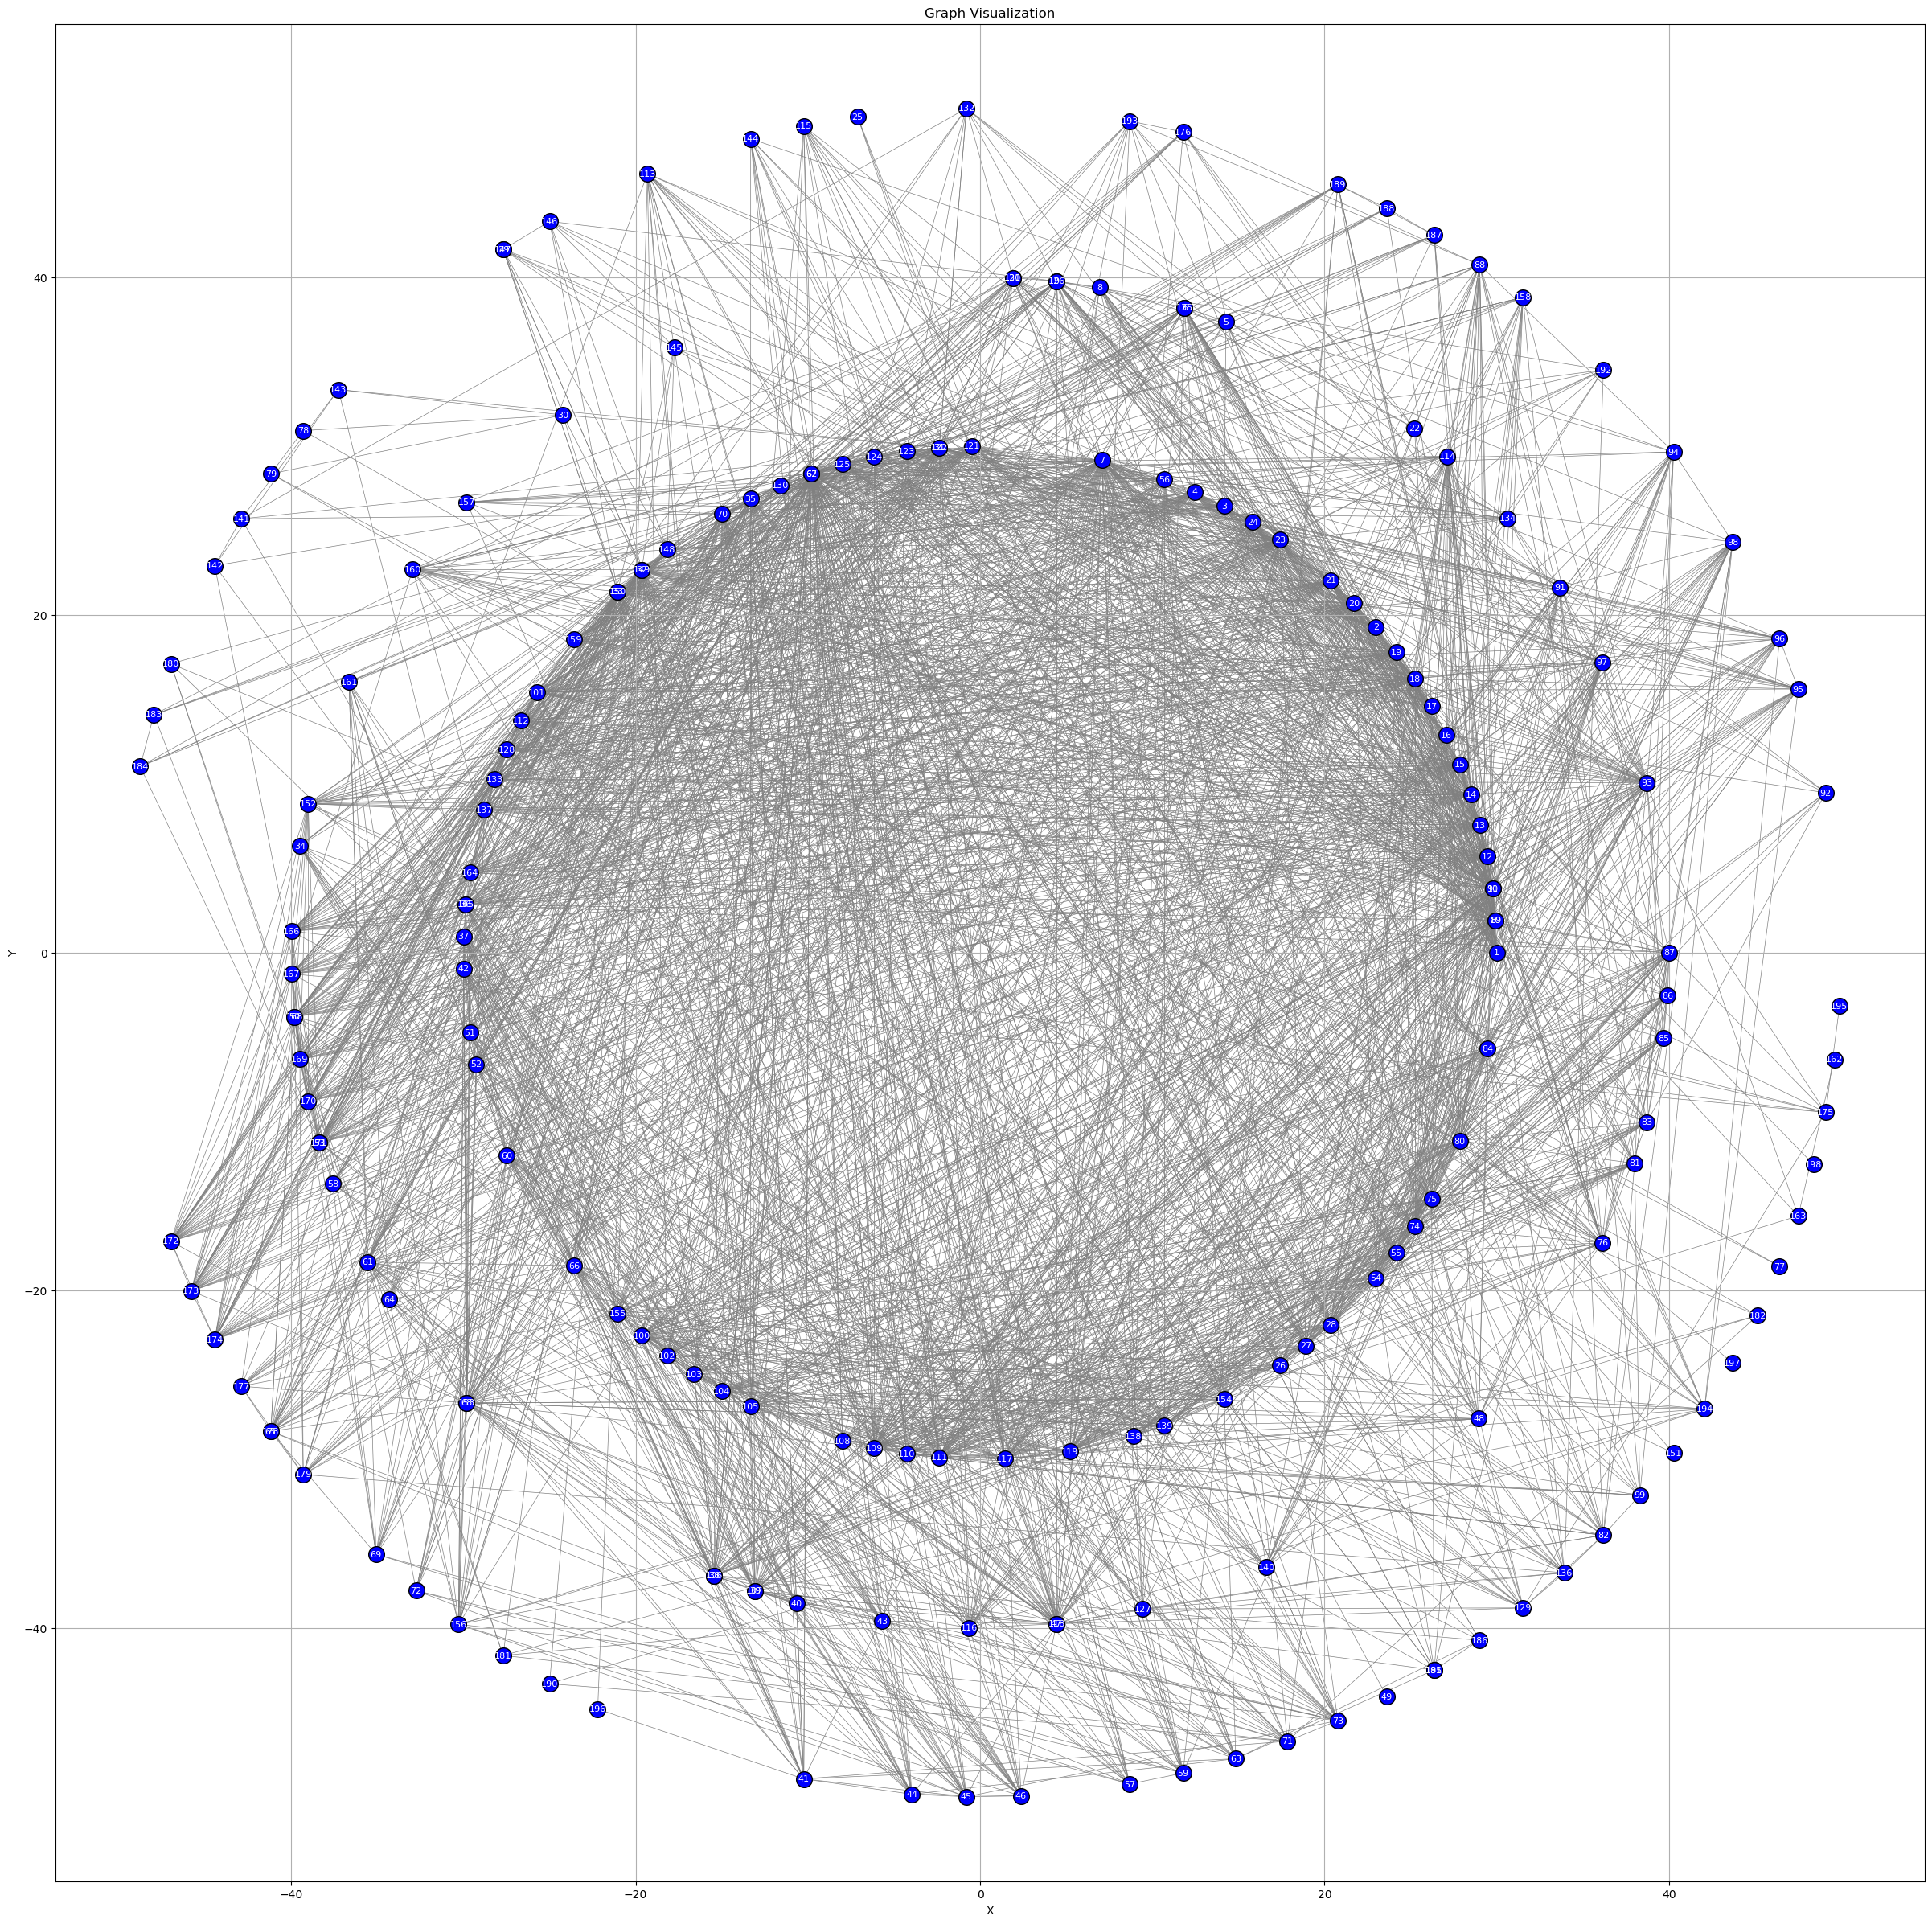

In [11]:
def BFS_graph(graph,tree_table):
    
    for vertex in graph.vertices:
        if (tree_table[vertex.id].getColor() != 2) or (tree_table[vertex.id].getDistance() == float('inf')):
            graph.vertices.remove(vertex)
            for edge in graph.edges:
                if edge.start == vertex or edge.end == vertex:
                    print(edge)
                    graph.edges.remove(edge)
        # for edge in graph.edges:
        #     if edge.start != graph.get_vertex(tree_table[vertex.id].getParent()) and edge.end == vertex:
        #         graph.edges.remove(edge)
    return graph

bfs_graph = BFS_graph(graph,tree_table)
visualize_graph(bfs_graph,30,50,tree_table)

In [13]:
place_vertices_in_tree(bfs_graph,tree_table)

      id  color  distance parent
0      1      2         0   None
22     8      2         1      1
21     7      2         1      1
20     6      2         1      1
19     5      2         1      1
..   ...    ...       ...    ...
169   40      2         4     37
173   45      2         4     62
164  181      2         4     32
197  195      2         4    175
192   77      2         5     78

[198 rows x 4 columns]
